Installing all the dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style(style = "darkgrid")
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [2]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\04. ML project Approach'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

### Step - 1: Understanding the Business Requirements and Nature of the Data

Most Machine Learning models are trained to serve a real-world use case. It's important to understand the business requirements, modelling objective and the nature of the data available before you start building a machine learning model.

##### Understand the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders ad identify following.
1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impcat will it have on the business?
3. How is this problem solved currently, without any machine learning model?
4. Who will use this the results of this model, and how does it fit into other business processess?
5. How much historical data do we have and how it is collected?
6. What features does the historical data contain? Does it contain the historical data that we are trying to predict?
7. What are some known issues with the data (data entry errors, missing data, differences in units, etc.)?
8. Can we look at some samples rows deom the data? How representative are they of the entrire data?
9. Where is the data is stored and how will you get access to it?

### Step - 2: Classify the problem as Supervised/unsupervised and regression/classification

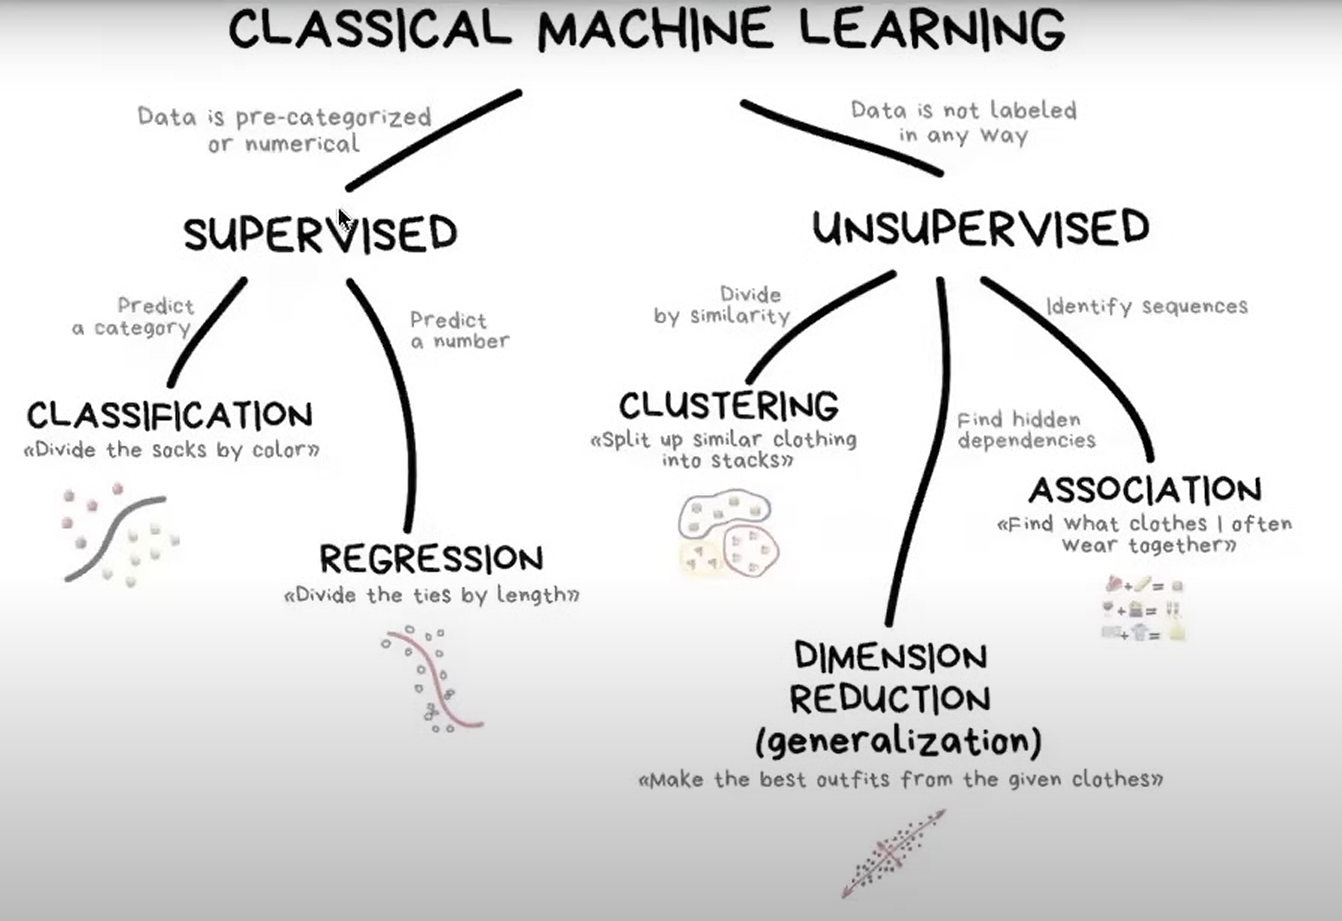

##### Loss functions and Evaluation Metrics

Once you have identified the type of preoblem you're solving, you need to pick an appropriate evaluation metric. Also, on the type of model you train, your model will also use loss function to optimize during the training process.

- **Evaluation Metrics:** They're used by humans to evaluate ML model.
- **Loss Functions:** They're used by computers to evaluate ML model.

### Step - 3: Download, clean and Explore the data and create new features

##### Downloading the data

There may be sources to get the data:
- CSV files
- SQL databases
- Raw File URL's
- Kaggle datasets
- Google drive
- Dropbox

In [5]:
od.download("https://www.kaggle.com/c/rossmann-store-sales", data_dir = "Dataset/")

Skipping, found downloaded files in "Dataset/rossmann-store-sales" (use force=True to force download)


In [6]:
os.listdir("Dataset/rossmann-store-sales/")

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [7]:
ross_df = pd.read_csv("Dataset/rossmann-store-sales/train.csv", low_memory = False)

In [8]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
store_df = pd.read_csv("Dataset/rossmann-store-sales/store.csv", low_memory = False)

In [10]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [11]:
merged_df = ross_df.merge(store_df, how = "left", on = "Store")
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
merged_df.shape

(1017209, 18)

In [13]:
test_df = pd.read_csv("Dataset/rossmann-store-sales/test.csv", low_memory = False)

In [14]:
test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [18]:
merged_test_df = test_df.merge(store_df, how = "left", on = "Store")

In [19]:
merged_test_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [20]:
merged_test_df.shape

(41088, 17)

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [23]:
round(merged_df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [24]:
merged_df.duplicated().sum()

0

In [25]:
merged_df["Date"] = pd.to_datetime(merged_df.Date)

In [26]:
merged_test_df["Date"] = pd.to_datetime(merged_test_df.Date)

In [27]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [28]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

#### Exploratory Data Analysis and Visualization

Objectives of EDA:
- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data. (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature enginerring

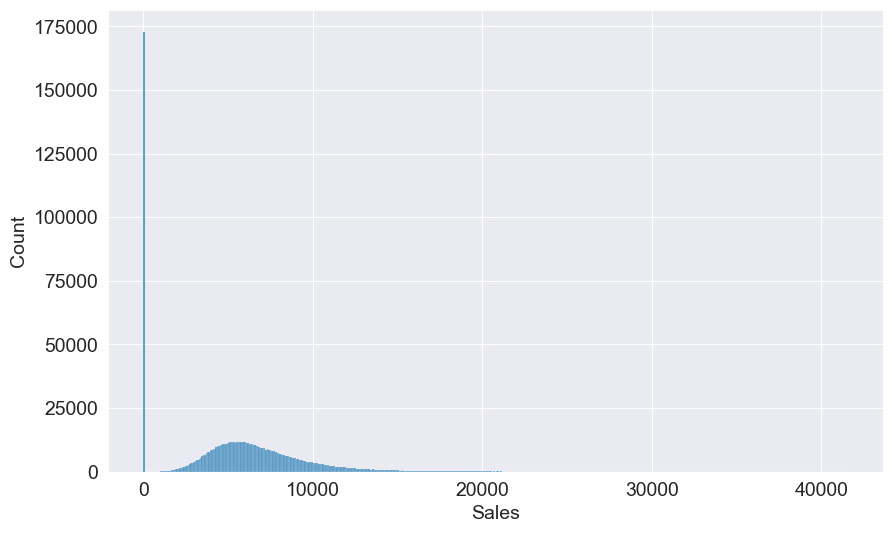

In [30]:
sns.histplot(data = merged_df, x = "Sales")
plt.show()

In [31]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [32]:
merged_df.Sales.value_counts()[0]

172871

In [34]:
merged_df = merged_df[merged_df["Open"] == 1].copy()

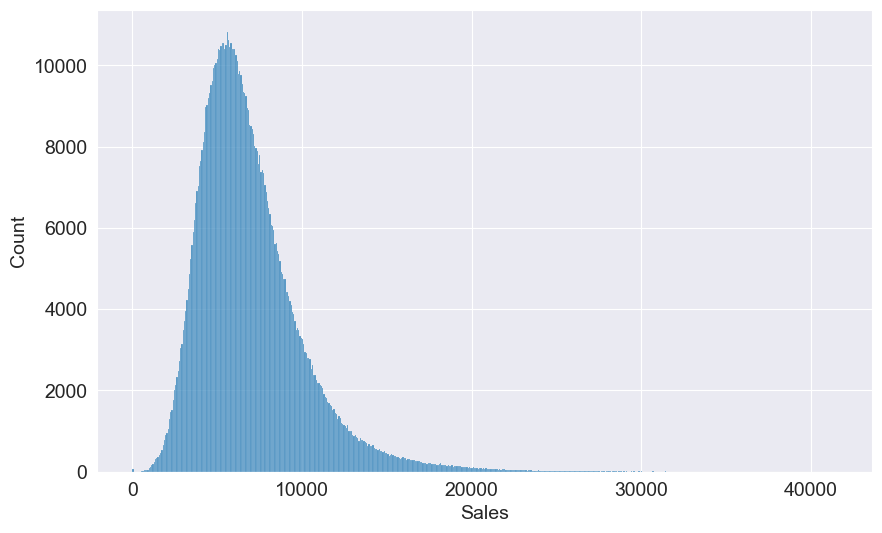

In [37]:
sns.histplot(data = merged_df, x = "Sales")
plt.show()

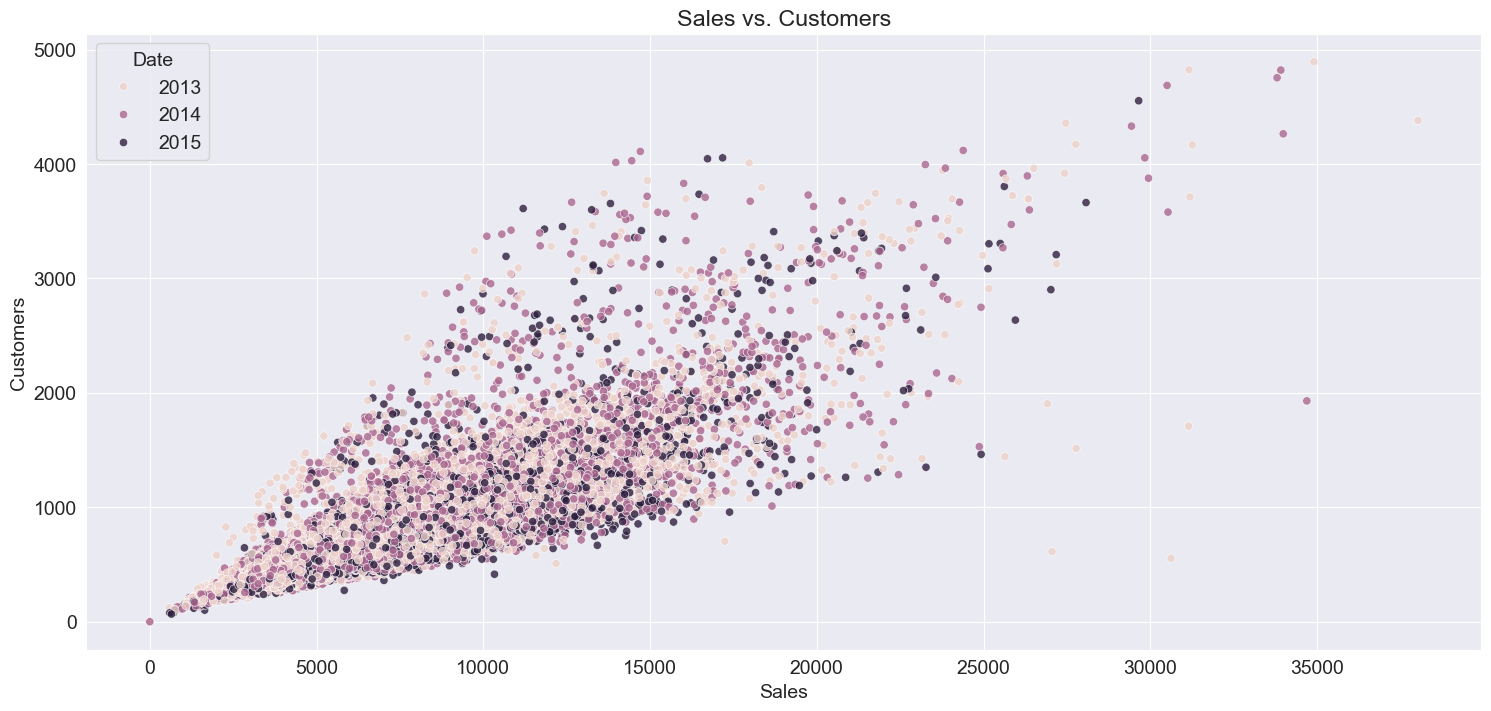

In [39]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Sales vs. Customers")
plt.show()

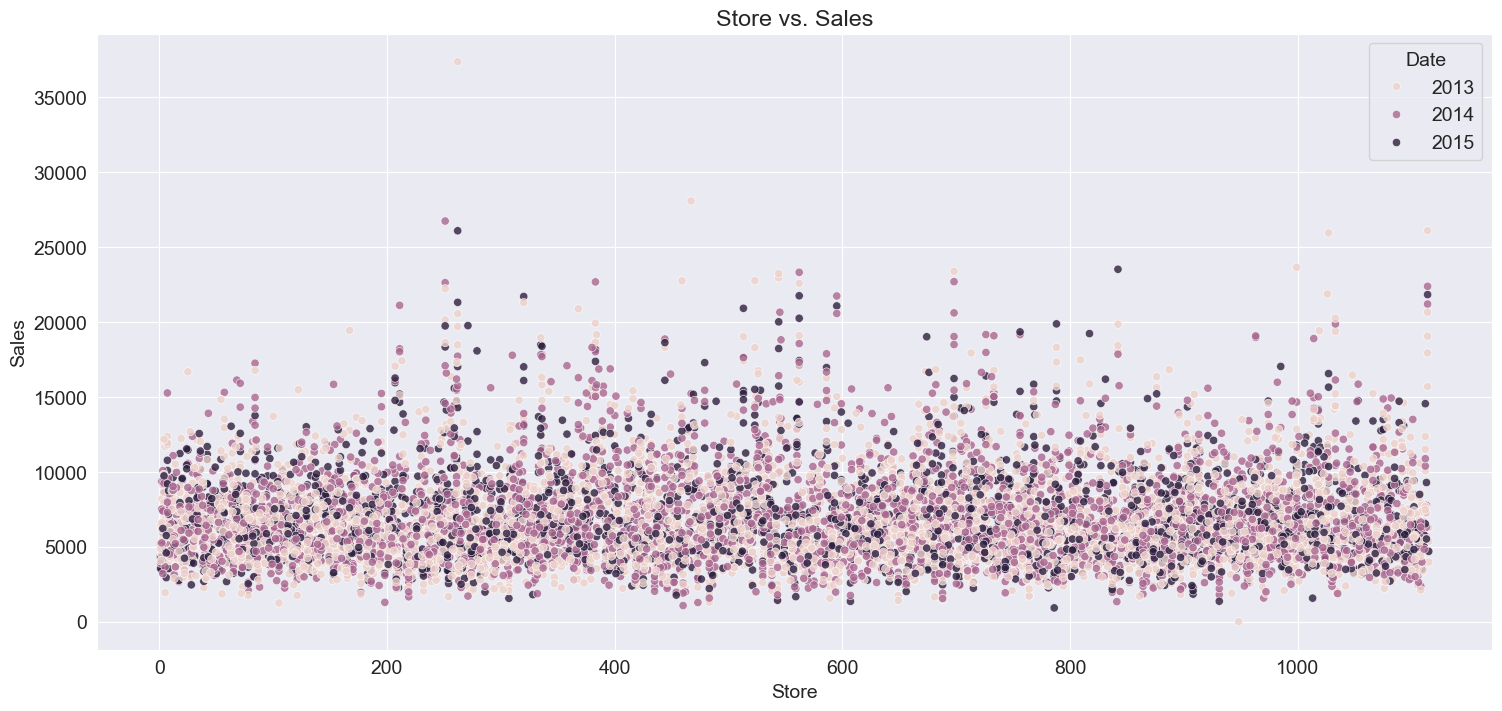

In [40]:
plt.figure(figsize = (18, 8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Store vs. Sales")
plt.show()

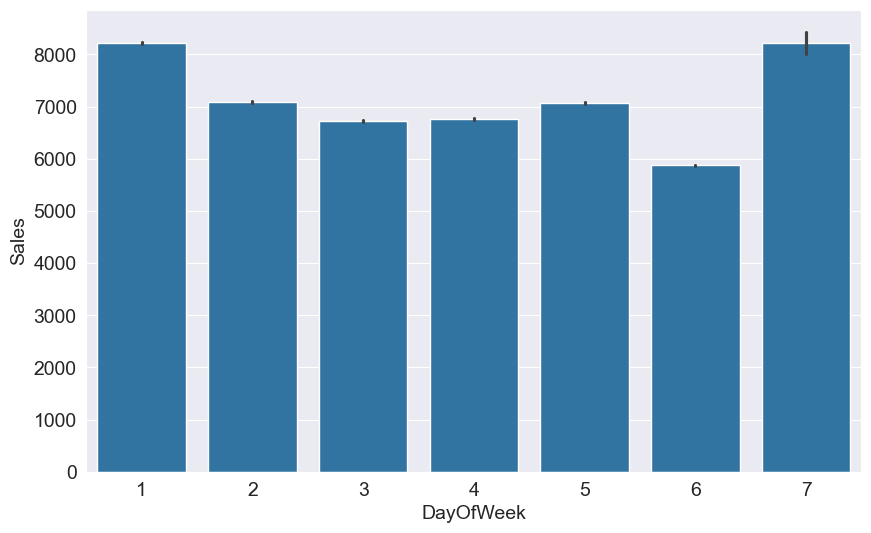

In [41]:
sns.barplot(data = merged_df, x = "DayOfWeek", y = "Sales")
plt.show()

<Axes: xlabel='Promo', ylabel='Sales'>

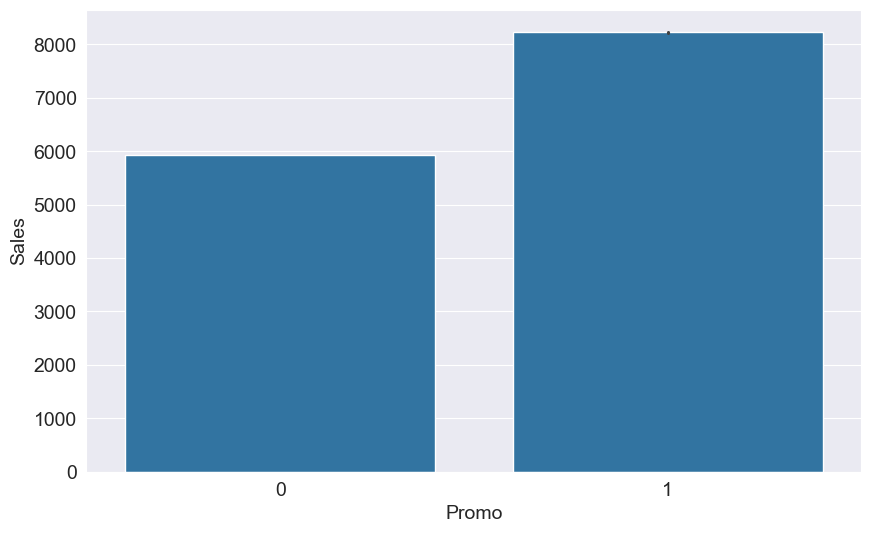

In [42]:
sns.barplot(data = merged_df, x = "Promo", y = "Sales")
plt.show()

In [44]:
num_cols = merged_df.select_dtypes(include=['number']).columns.tolist()

In [45]:
merged_df[num_cols].corr()["Sales"].sort_values(ascending = False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64